**You'll be working on building a recommendation engine for our e-commerce platform. Utilizing customer behavior data and machine learning techniques, you'll design a system capable of suggesting personalized product recommendations to users, enhancing their shopping experience and increasing sales.**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('flipkart_reviews_large_dataset_sample.csv')

In [3]:
df.head()

,ProductUrl,productTitle,productPrice,averageRating,reviewTitle,reviewDescription,reviewAuthor,reviewAt,reviewLikes,reviewDislikes,certifiedBuyer,reviewerLocation,fiveStarRatingCount,fourStarRatingCount,threeStarRatingCount,twoStarRatingCount,oneStarRatingCount,reviewImages,scrapedAt,uniqId
0,https://www.flipkart.com/samsung-galaxy-nxt-go...,"SAMSUNG Galaxy On Nxt (Gold, 16 GB)","₹9,499",4.3,Just wow!,unbelievable,KOUSIK DUTTA,"Aug, 2018",0,0,True,Burdwan,"2,20,147","83,936","30,026","10,267","21,199",NaN,21/02/2022 00:57:30,db7fc5e1-684d-5d92-a41b-25e40f37c0fe
1,https://www.flipkart.com/samsung-galaxy-nxt-go...,"SAMSUNG Galaxy On Nxt (Gold, 16 GB)","₹9,499",4.3,Awesome,good mobile,Flipkart Customer,"Aug, 2018",0,0,True,Kurnool,"2,20,147","83,936","30,026","10,267","21,199",NaN,21/02/2022 00:57:30,a2661c23-13b4-5823-959d-4324b9442056
2,https://www.flipkart.com/samsung-galaxy-nxt-go...,"SAMSUNG Galaxy On Nxt (Gold, 16 GB)","₹9,499",4.3,Does the job,good,Rakesh Ranjan,"Aug, 2018",0,0,True,Noida,"2,20,147","83,936","30,026","10,267","21,199",NaN,21/02/2022 00:57:30,0f2d6a35-7f63-57f8-8d20-0c8ab3141c74
3,https://www.flipkart.com/samsung-galaxy-nxt-go...,"SAMSUNG Galaxy On Nxt (Gold, 16 GB)","₹9,499",4.3,Good,it's good,PabiT Gouda,"Aug, 2018",0,0,True,Behror,"2,20,147","83,936","30,026","10,267","21,199",NaN,21/02/2022 00:57:30,f39db306-aca5-5c62-a75b-a9248de9566f
4,https://www.flipkart.com/samsung-galaxy-nxt-go...,"SAMSUNG Galaxy On Nxt (Gold, 16 GB)","₹9,499",4.3,Wonderful,very nice,Sujal Patel,"Aug, 2018",0,0,True,Dharampur,"2,20,147","83,936","30,026","10,267","21,199",NaN,21/02/2022 00:57:30,27d2b3b2-7034-52b8-9b64-df5778853f44


In [4]:
df.shape

(674, 20)

**Data Preprocessing**

In [5]:
df.isnull().sum()

ProductUrl                0
productTitle              0
productPrice              0
averageRating             0
reviewTitle               1
reviewDescription         0
reviewAuthor              0
reviewAt                  0
reviewLikes               0
reviewDislikes            0
certifiedBuyer            0
reviewerLocation          0
fiveStarRatingCount       0
fourStarRatingCount       0
threeStarRatingCount      0
twoStarRatingCount        0
oneStarRatingCount        0
reviewImages            417
scrapedAt                 0
uniqId                    0
dtype: int64

In [3]:
df['reviewTitle'].fillna('No Title', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18160\2626396463.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviewTitle'].fillna('No Title', inplace=True)


In [4]:
df['reviewTitle'].isnull().sum()

0

In [5]:
df['reviewImages'].fillna('No Image', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18160\376645201.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviewImages'].fillna('No Image', inplace=True)


In [6]:
df['reviewImages'].isnull().sum()

0

In [7]:
# removing Rupee symbol
df['productPrice'] = df['productPrice'].str.replace('₹', '').str.replace(',', '').astype(float)

In [8]:
# Removing commas
rating_columns = ['fiveStarRatingCount', 
                  'fourStarRatingCount', 
                  'threeStarRatingCount', 
                  'twoStarRatingCount', 
                  'oneStarRatingCount']

for col in rating_columns:
    df[col] = df[col].str.replace(',', '').astype(int)

In [9]:
df.dtypes

ProductUrl               object
productTitle             object
productPrice            float64
averageRating           float64
reviewTitle              object
reviewDescription        object
reviewAuthor             object
reviewAt                 object
reviewLikes               int64
reviewDislikes            int64
certifiedBuyer             bool
reviewerLocation         object
fiveStarRatingCount       int32
fourStarRatingCount       int32
threeStarRatingCount      int32
twoStarRatingCount        int32
oneStarRatingCount        int32
reviewImages             object
scrapedAt                object
uniqId                   object
dtype: object

In [10]:
df.head()

,ProductUrl,productTitle,productPrice,averageRating,reviewTitle,reviewDescription,reviewAuthor,reviewAt,reviewLikes,reviewDislikes,certifiedBuyer,reviewerLocation,fiveStarRatingCount,fourStarRatingCount,threeStarRatingCount,twoStarRatingCount,oneStarRatingCount,reviewImages,scrapedAt,uniqId
0,https://www.flipkart.com/samsung-galaxy-nxt-go...,"SAMSUNG Galaxy On Nxt (Gold, 16 GB)",9499.0,4.3,Just wow!,unbelievable,KOUSIK DUTTA,"Aug, 2018",0,0,True,Burdwan,220147,83936,30026,10267,21199,No Image,21/02/2022 00:57:30,db7fc5e1-684d-5d92-a41b-25e40f37c0fe
1,https://www.flipkart.com/samsung-galaxy-nxt-go...,"SAMSUNG Galaxy On Nxt (Gold, 16 GB)",9499.0,4.3,Awesome,good mobile,Flipkart Customer,"Aug, 2018",0,0,True,Kurnool,220147,83936,30026,10267,21199,No Image,21/02/2022 00:57:30,a2661c23-13b4-5823-959d-4324b9442056
2,https://www.flipkart.com/samsung-galaxy-nxt-go...,"SAMSUNG Galaxy On Nxt (Gold, 16 GB)",9499.0,4.3,Does the job,good,Rakesh Ranjan,"Aug, 2018",0,0,True,Noida,220147,83936,30026,10267,21199,No Image,21/02/2022 00:57:30,0f2d6a35-7f63-57f8-8d20-0c8ab3141c74
3,https://www.flipkart.com/samsung-galaxy-nxt-go...,"SAMSUNG Galaxy On Nxt (Gold, 16 GB)",9499.0,4.3,Good,it's good,PabiT Gouda,"Aug, 2018",0,0,True,Behror,220147,83936,30026,10267,21199,No Image,21/02/2022 00:57:30,f39db306-aca5-5c62-a75b-a9248de9566f
4,https://www.flipkart.com/samsung-galaxy-nxt-go...,"SAMSUNG Galaxy On Nxt (Gold, 16 GB)",9499.0,4.3,Wonderful,very nice,Sujal Patel,"Aug, 2018",0,0,True,Dharampur,220147,83936,30026,10267,21199,No Image,21/02/2022 00:57:30,27d2b3b2-7034-52b8-9b64-df5778853f44


**Data Analysis**

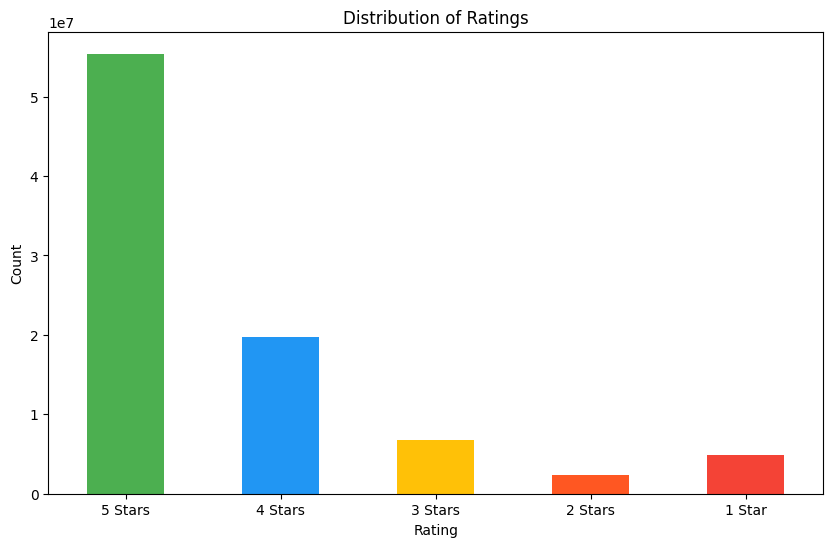

In [11]:
import matplotlib.pyplot as plt

rating_counts = df[['fiveStarRatingCount', 
                    'fourStarRatingCount', 
                    'threeStarRatingCount', 
                    'twoStarRatingCount', 
                    'oneStarRatingCount']].sum()

plt.figure(figsize=(10, 6))

rating_counts.plot(kind='bar', color=['#4CAF50', 
                                      '#2196F3', 
                                      '#FFC107', 
                                      '#FF5722', 
                                      '#F44336'])

plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.xticks(ticks=range(5), rotation=0, labels=['5 Stars', 
                                               '4 Stars', 
                                               '3 Stars', 
                                               '2 Stars', 
                                               '1 Star'])
plt.show()

**Model Selection**

Surprise is a Python scikit for **building and analyzing recommender systems** that deal with explicit **rating data**.
Surprise was designed with the following purposes in mind: Give users perfect control over their experiments.
Surprise provides various tools to run cross-validation procedures and search the best parameters for a prediction algorithm. 

In [13]:
from surprise import Dataset, Reader

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['reviewAuthor', 
                                'productTitle', 
                                'averageRating']], reader)

In [14]:
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.2)

In [16]:
from surprise import SVD

model = SVD()
model.fit(trainset)

In [17]:
predictions = model.test(testset)

In [20]:
from surprise.model_selection import cross_validate

cross_validate(model, data, measures=['RMSE', 'MAE'], 
               cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.1323  0.1169  0.1476  0.1104  0.1264  0.1267  0.0129  
MAE (testset)     0.1023  0.0946  0.1094  0.0812  0.0931  0.0961  0.0095  
Fit time          0.02    0.01    0.01    0.01    0.01    0.01    0.00    
Test time         0.00    0.00    0.01    0.00    0.00    0.00    0.00    


{'test_rmse': array([0.13233698, 0.11694786, 0.14759241, 0.11043711, 0.12637899]),
 'test_mae': array([0.10229739, 0.09459811, 0.10937598, 0.08116086, 0.09308113]),
 'fit_time': (0.015388727188110352,
  0.009551048278808594,
  0.01375436782836914,
  0.010773181915283203,
  0.013584613800048828),
 'test_time': (0.0027141571044921875, 0.0, 0.008050203323364258, 0.0, 0.0)}

**Generate Recommendations**

In [23]:
def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.'''
    top_n = defaultdict(list)
    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [24]:
top_n = get_top_n(predictions, n=10)

In [25]:
recommendations = []

for uid, user_ratings in top_n.items():
    for (iid, est) in user_ratings:
        recommendations.append([uid, iid, est])

In [26]:
recommendations_df = pd.DataFrame(recommendations, 
                                  columns=['User', 
                                           'Product', 
                                           'EstimatedRating'])

In [27]:
recommendations_df.head()

,User,Product,EstimatedRating
0,VINOTH S,Skullcandy Ink'd Bluetooth Headset with Mic,4.186444
1,Amol,Skullcandy Jib Headset with mic,4.141376
2,Aamir Haque,"APPLE iPhone SE (Black, 256 GB)",4.356553
3,Maheshswari Maheshswari,"REDMI 9i (Sea Blue, 64 GB)",4.257640
4,Vivek Kumar,boAt BassHeads 220 Super Extra Bass Wired Headset,4.195832


In [28]:
recommendations_df.to_csv('recommendations.csv', index=False)